# Homework 1 

This page will help you visualize the function in Problem 2 in your homework, while teaching you a bit about the following python modules, in case you are not already familiar with them:
- [SymPy](http://docs.sympy.org/latest/index.html), a library for symbolic computation;
- [NumPy](http://www.numpy.org/), a library for scientific computation;
- [Matplotlib.pyplot](https://matplotlib.org/api/pyplot_summary.html), a module to generate mathematical plots quickly and easily.

<!-- A good resource for basic plotting is http://courses.csail.mit.edu/6.867/wiki/images/3/3f/Plot-python.pdf /-->

Go through the cells below, reading the code and executing one cell at a time. Once you have gone through the example, solve the simple exercise at the bottom by creating your own cells and executing them. Submit your code cells and  resulting plots with your homework on Gradescope.

## Problem 2

We are interested in the following function
$f(x_1, x_2) = x_1^4 + x_2^4 − x_1 x_2^3 − x_1^2 x_2^2+ x_1^3 + x_2^3.$

### Symbolic Differentiation

Using the sympy module, we can differentiate the function symbolically.

In [10]:
import sympy as sp
from sympy.tensor.array import derive_by_array

x, y = sp.symbols('x,y')                                        # Define symbols x and y
fun = x**4 + y**4 - x*(y**3) - (x**2)*(y**2) + x**3 + y**3      # Define a symbolic expression corresponding to f
numfun = sp.lambdify((x,y), fun)                                # This command turns the symbolic expression f into 
                                                                       # a numerical function of two arguments

grad = derive_by_array(fun, [x,y])                              # Computes the gradient of the symbolic expression expr
numgrad = sp.lambdify((x,y),grad)                               # Numerical version of the gradient

hessian = derive_by_array(grad, [x,y])
numhessian = sp.lambdify((x,y),hessian)          

#### Try to print out fun, grad and hessian to check the corresponding symbolic expression.
#### What happens when you try to print the numerical functions?

### Numerical Evaluation

The numerical functions are actual python functions which we can evaluate numerically and plot.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # Object need for 3D plots

xvals = np.arange(-5,5,0.2)               # Return an array containing evenly spaced values (spaced by -0.2)
yvals = np.arange(-5,5,0.2)               # in the open interval [-5,5)

X, Y = np.meshgrid(xvals, yvals)          # Same as MATLAB meshgrid: returns coordinate matrices from coordinate vectors.

F = numfun(X,Y)                           # Evaluates numfun on the grid (X,Y)

### Plotting

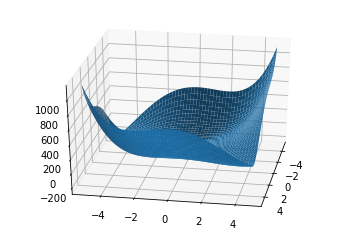

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,F)
ax.view_init(azim=10)                     # Rotates the plot by 10 degrees. Try changing the angle.
plt.show()

### Contour and Gradient Plot

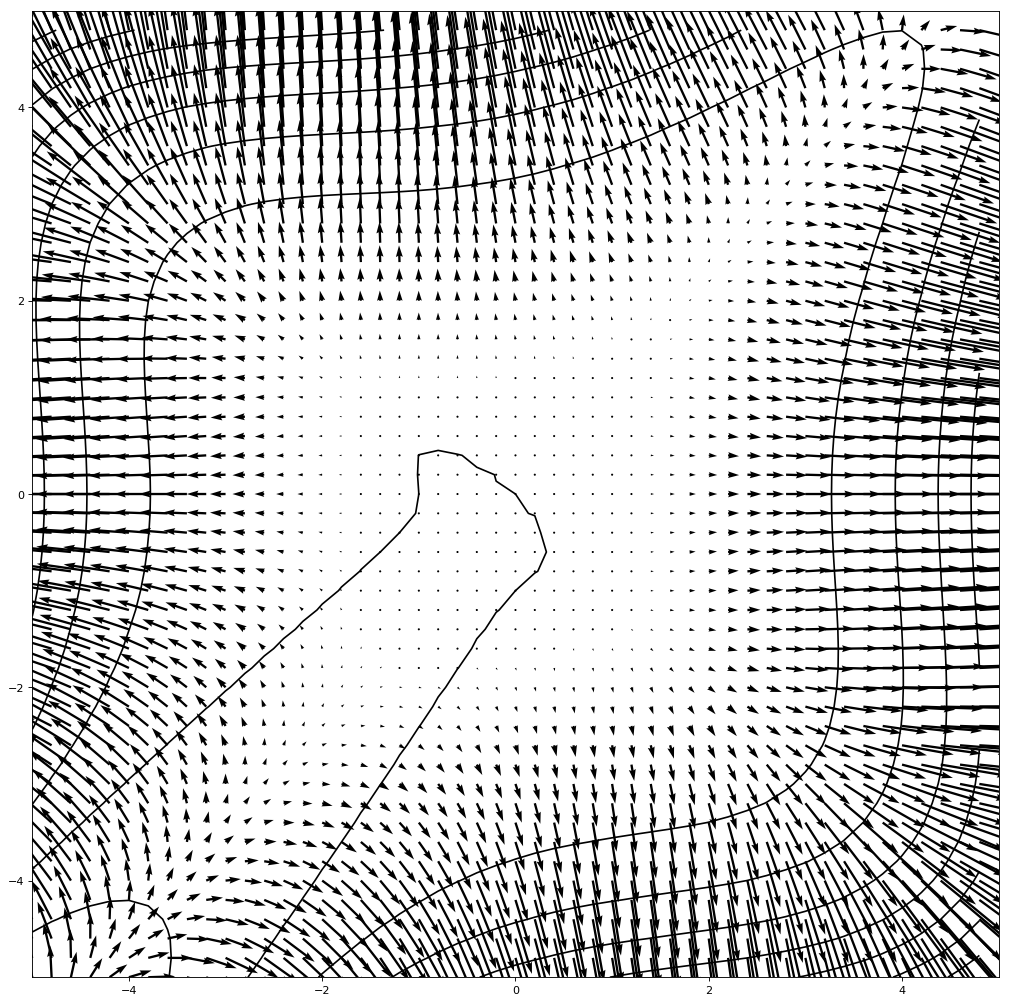

In [13]:
U,V = numgrad(X,Y)                         # Evaluates the gradient coordinates on the grid (X,Y)

plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.contour(X, Y, F, 10, colors = 'k', linestyles = 'solid')        # Generates the controu plot for f
plt.axes().set_aspect('equal')                                      # Scale the plot size to get same aspect ratio
plt.axis([-5, 5, -5, 5])

plt.quiver(X, Y, U, V, edgecolor='k', scale = 5000)                 # Plots the vecotr field U,V over the grid (X,Y)
                                                                    # while scaling the arrows by the scale factor

plt.show()

## Computing the eigenvalues of a matrix

Let's compute the hessian of $f$ at point $(0,1)$.

In [14]:
H = numhessian(0,1)

How can we check if it is positive semidefinite? We can find its eigenvalues using the following command. In this case one is negative and the other is positive, so the hessian is indefinite.

In [15]:
w,v = np.linalg.eigh(H)   # w contains the eigenvalues, v the eigenvectors. The h in eigh stands for Hermitian.

w                         # print w

array([ -2.44030651,  18.44030651])

# Exercise: It's your turn

Consider the function given by the quadratic form of the Hessian at point (1,1). That is the function:
$$
g(\vec{z}) = z^T \; \nabla^2 f(1,1) \; z
$$

Adapt the code above to produce the following plots: 

1. 3d-representation of $g$ over $[-5,5]\times [-5,5]$ 
2. A contour-and-gradient plot of $g$ over the same square

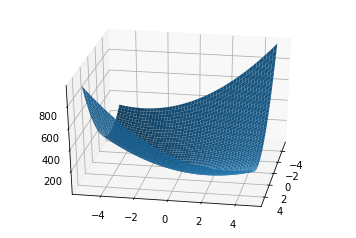

In [16]:
A = np.matrix(numhessian(1,1))

@np.vectorize
def gfunc(z_1,z_2):
    a = np.dot(np.array([z_1,z_2]).T, np.dot(numhessian(1,1),[z_1,z_2]))
    return np.asscalar(a)

F = gfunc(X,Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,F)
ax.view_init(azim=10)                     # Rotates the plot by 10 degrees. Try changing the angle.
plt.show()

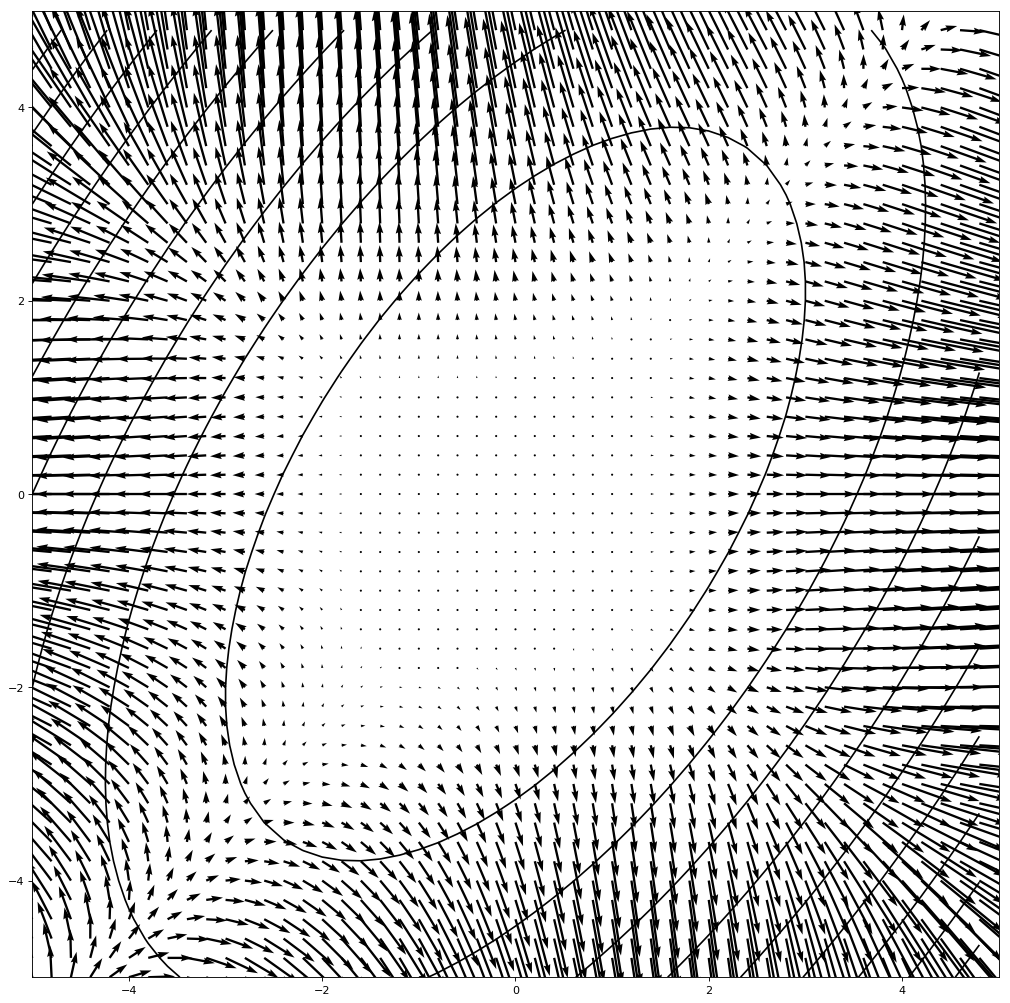

In [18]:
U,V = numgrad(X,Y)                         # Evaluates the gradient coordinates on the grid (X,Y)

plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.contour(X, Y, F, 10, colors = 'k', linestyles = 'solid')        # Generates the controu plot for f
plt.axes().set_aspect('equal')                                      # Scale the plot size to get same aspect ratio
plt.axis([-5, 5, -5, 5])

plt.quiver(X, Y, U, V, edgecolor='k', scale = 5000)                 # Plots the vecotr field U,V over the grid (X,Y)
                                                                    # while scaling the arrows by the scale factor

plt.show()